In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model                 #Loaded after getting errors from Google Colab
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input     #Loaded after getting errors from Google Colab


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank_loan.csv to bank_loan (2).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank_loan.csv']))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df = df.dropna()                       # Drop missing Values
print(str(df.isna().any()))            # Check for Missing Values
df.drop('Loan_ID', axis=1)             # Drop unnecesariy ID column
df['LoanAmount'] = (df['LoanAmount'] * 1000).astype(int)  # Scale  Loan Amount 1000 times
Counter(df['Loan_Status'])             # Check for Imbalance in our Dependant Variable (Loan_Status)

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool


Counter({'N': 148, 'Y': 332})

In [5]:
pred_y = df['Loan_Status']               # Prepare our Prediction Y extracting the Dependant Variables
pred_X = df.drop('Loan_Status', axis=1)  # Dropping the Dependant Variable from our Independants Variables
                                         # For getting rid of categorical data we can:  
print(type(pred_y))                      # Use df_example.map(dict(Y=1,N = 0)) on Series types (Series are one-dimensional objects that can hold any data type)
print(type(pred_X))                      # Use np.get_dummies() on DataFrame types (A DataFrame is a two dimensional object that can have columns with potential different types)
dm_y = pred_y.map(dict(Y=1, N=0))        # Transforming Categorical Data into 1's and 0's in our Dependants Vars by mapping dicts
dm_X = pd.get_dummies(pred_X)            # Transforming Categorical Data into 1's and 0's in our Independants Vars w/ get_dummies()
print(dm_y)                              # Checking our Dummy Variables
print(dm_X)                              # Checking our Dummy Variables


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64
     Dependents  ApplicantIncome  ...  Property_Area_Semiurban  Property_Area_Urban
1           1.0             4583  ...                        0                    0
2           0.0             3000  ...                        0                    1
3           0.0             2583  ...                        0                    1
4           0.0             6000  ...                        0                    1
5           2.0             5417  ...                        0                    1
..          ...              ...  ...                      ...                  ...
609         0.0             2900  ...                        0                    0
610         3.0             4106  ...                        0                    0
611         1.0           

In [6]:
smote = SMOTE(ratio='minority')           # preparing our variable with the SMOTE for Over Sampling over the imbalanced values of dm_y 
X1, y = smote.fit_sample(dm_X, dm_y)      # Resample our Datasets isun the SMOTE 
print(str(Counter(y)))                    # Check for Imbalances in our Dependant Variable (Loan_Status)
scale= MinMaxScaler()                     # Scale bettween the Minimal Value and the Maximal Value in the columns
X = scale.fit_transform(X1)               # Scaling removing the mean and scaling to unit variance 


Counter({0: 332, 1: 332})


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, shuffle=True) # Split data 

In [8]:
classifier = Sequential() # Prepare our Classifier Model for adding Hidden Layers with Sequential class
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1])) # First Hidden Layer 
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))                            # Second Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))                              # Third Hidden Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))                           # ONE Output: Approved or Rejected 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])                      # Compile Layers looking for Truely Responses (Accuracy)
classifier.fit(X_train, y_train, batch_size=20, epochs= 50, verbose=0)                                       # Fit our Datasets into the Classifier Model
eval_model = classifier.evaluate(X_train,y_train)                                                            # Returns the loss value & Accuracy values
eval_model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
531/531 [==============================] - 0s 81us/sample - loss: 0.1353 - acc: 1.0000


[0.13528425079505546, 1.0]

In [0]:
y_pred = classifier.predict(X_test)     # Use our Model to Predict/Classify
y_pred = (y_pred>0.52)                  # Raise the Threshold to 0.52 

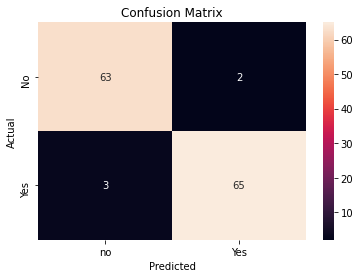

In [21]:
from sklearn.metrics import confusion_matrix      
cm = confusion_matrix(y_test, y_pred)             # Make a Confussion Matrix 
ax = plt.subplot()                                # Graph the CM 
sns.heatmap(cm, annot=True, ax= ax,);             # Get the Inner Annotations and the Heat Map using SeaBorn

#Labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');       #Labels for the Graph
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['no', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [23]:
import pickle                               # Use Pickle to export our Model
from sklearn.externals import joblib        
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)


TypeError: ignored

In [20]:
from sklearn.model_selection import StratifiedKFold                           
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0) 
csvscores  =[]
for train, test, in kfold.split(X,y):
  # Creates a model
  model = Sequential()
  model.add(Dense(200, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
  # Fit the model
  model.fit(X[train], y[train], epochs= 100, verbose=0)
  # Evaluate model
  scores = model.evaluate(X[test], y[test], verbose=0)
  print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))
  csvscores.append(scores[1] * 100 )
print('%.2f%% (+/- %.2f%%)' % (np.mean(csvscores), np.std(csvscores)) )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
acc: 91.89%
acc: 92.76%
acc: 89.14%
91.26% (+/- 1.54%)
